
# plot_calibration_curve with examples

An example showing the plot_calibration_curve method
used by a scikit-learn classifier


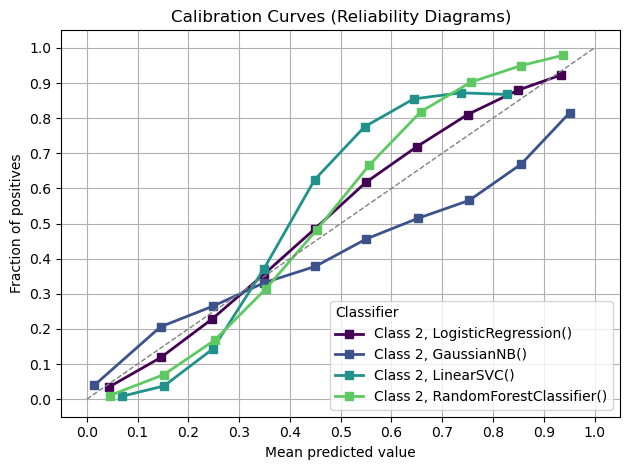

In [1]:
# Authors: scikit-plots developers
# License: MIT

from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# Import scikit-plot
import scikitplot as skplt

# Load the data
X, y = make_classification(
    n_samples=100000, 
    n_features=20,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=0
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

# Create an instance of the LogisticRegression
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_val)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_val)

probas_dict = {
    LogisticRegression(): lr_probas,
    GaussianNB(): nb_probas,
    LinearSVC(): svc_scores,
    RandomForestClassifier(): rf_probas,
}
# Plot!
ax = skplt.metrics.plot_calibration_curve(
    y_val,
    y_prob_list=list(probas_dict.values()),
    y_is_decision=list([False, False, True, False]),
    n_bins=10, 
    clf_names=list(probas_dict.keys()),
    multi_class=None,
    class_index=2, 
    classes_to_plot=[2],
);
# Adjust layout to make sure everything fits
plt.tight_layout()
# Save the plot to a file
plt.savefig('plot_calibration_curve_script.png')
# Display the plot
plt.show(block=True)